In [6]:
%matplotlib notebook

In [7]:
import xtrack as xt
import numpy as np
import bpmeth
import matplotlib.pyplot as plt

Dipole

In [8]:
phi = 60/180*np.pi
rho = 0.927  # https://edms.cern.ch/ui/file/1311860/2.0/LNA-MBHEK-ER-0001-20-00.pdf
dipole_h = 1/rho
l_magn = rho*phi
gap=0.076

data = np.loadtxt("../dipole/ELENA_fieldmap.csv", skiprows=1, delimiter=",")[:, [0,1,2,7,8,9]]


In [9]:
kf=1.000
guess = [ 1.09058298e+00, 3.19608461e+02, -1.03315497e+02, 2.80836370e+01, 4.23617617e-01]
dipole = bpmeth.DipoleFromFieldmap(data, 1/rho, l_magn,
                                   design_field=dipole_h*kf, shape="enge", hgap=gap/2, apt=gap,
                                   radius=0.0025, order=2, plot=True, nphi=2,
                                   guess = guess )
line=xt.Line([dipole])
line.particle_ref = xt.Particles(p0c=1.0, mass0=0.9382720813)
line.build_tracker()
p0=line.build_particles(x=[0.00])
tw=line.twiss(betx=1,bety=1,include_collective=True)
mat_xsuite=line.compute_one_turn_matrix_finite_differences(p0,include_collective=True)['R_matrix']
print(mat_xsuite[1,0],mat_xsuite[3,2],tw.x[-1],tw.px[-1])

Fitting multipoles


<IPython.core.display.Javascript object>

fitting b1...
fitting b2...
Central field in the magnet:  1.0886201584144615
Average field in the magnet:  1.0820658922774056
Rescaling field to match integrated field with design field
Central field in the magnet:  1.0852828245824857
Average field in the magnet:  1.078748651564186
Creating field expansion...
Creating Hamiltonian...
-0.5368143042799671 -0.4726649008391729 0.0007143343217518252 0.0009574038922841244


In [19]:
kf=1.0008781
guess = [ 1.09058298e+00, 3.19608461e+02, -1.03315497e+02, 2.80836370e+01, 4.23617617e-01]
dipole = bpmeth.DipoleFromFieldmap(data, 1/rho, l_magn,
                                   design_field=dipole_h*kf, shape="enge", hgap=gap/2, apt=gap,
                                   radius=0.0025, order=2, plot=False, nphi=2,
                                   guess = guess )
line=xt.Line([dipole])
line.particle_ref = xt.Particles(p0c=1.0, mass0=0.9382720813)
line.build_tracker()
p0=line.build_particles(x=[0.00])
dipole.track(p0)
print(p0.x, p0.px, p0.y, p0.py)

Fitting multipoles
fitting b1...
fitting b2...
Central field in the magnet:  1.0895760757157231
Average field in the magnet:  1.0830160523299548
Rescaling field to match integrated field with design field
Central field in the magnet:  1.0862358133845207
Average field in the magnet:  1.0796959007551243
Creating field expansion...
Creating Hamiltonian...
[5.58455158e-05] [7.48617972e-05] [0.] [0.]


In [20]:
tw=line.twiss(betx=1,bety=1,include_collective=True)
mat_dipole=line.compute_one_turn_matrix_finite_differences(p0,include_collective=True)['R_matrix']
print(mat_dipole[1,0],mat_dipole[3,2],tw.x[-1],tw.px[-1],np.linalg.det(mat_dipole))

-0.537525915800389 -0.4736539927380184 5.584551582791447e-05 7.486179722212981e-05 1.0000000007943253


In [23]:
kf_splines=1.0005
dipole_splines = bpmeth.MagnetFromFieldmap(data, 1/rho, l_magn, design_field=1/rho*kf_splines, order=1, hgap=gap/2, nphi=2, plot=True, step=25)
line=xt.Line([dipole_splines])
line.particle_ref = xt.Particles(p0c=1.0, mass0=0.9382720813)
line.build_tracker()
p0=line.build_particles(x=[0.00])
dipole_splines.track(p0)
print(p0.x, p0.px, p0.y, p0.py)

Fitting multipoles


<IPython.core.display.Javascript object>

Creating field expansion...
Creating Hamiltonian...
[4.29039603e-05] [0.00155704] [0.] [0.]


In [29]:
kf_splines=1.0006
dipole_splines = bpmeth.MagnetFromFieldmap(data, 1/rho, l_magn, design_field=1/rho*kf_splines, order=3, hgap=gap/2, nphi=2, plot=True, step=25)
line=xt.Line([dipole_splines])
line.particle_ref = xt.Particles(p0c=1.0, mass0=0.9382720813)
line.build_tracker()
p0=line.build_particles(x=[0.00])
dipole_splines.track(p0)
print(p0.x, p0.px, p0.y, p0.py)

Fitting multipoles


<IPython.core.display.Javascript object>

Creating field expansion...
Creating Hamiltonian...
[-0.00048547] [0.00079215] [0.] [0.]


In [ ]:
tw=line.twiss(betx=1,bety=1,include_collective=True)
mat_dipole=line.compute_one_turn_matrix_finite_differences(p0,include_collective=True)['R_matrix']
print(mat_dipole[1,0],mat_dipole[3,2],tw.x[-1],tw.px[-1],np.linalg.det(mat_dipole))

In [60]:
fint=0.395 #Field integral from fieldmap: 0.4264 0.424
hgap = gap/2
theta_E_xsuite=16.215/180*np.pi # 17 in the report 16.45 from opera simulation

bb=xt.Bend(length=l_magn, h=dipole_h, k0=dipole_h, edge_entry_fint=fint, edge_entry_hgap=hgap, model='bend-kick-bend',edge_entry_angle=theta_E_xsuite, edge_exit_angle=theta_E_xsuite, edge_exit_fint=fint, edge_exit_hgap=hgap)
bb.edge_entry_active = 1
bb.edge_exit_active = 1
dd=xt.Drift(length=fringelen)
line = xt.Line([dd, bb, dd])
line.particle_ref = xt.Particles(p0c=1.0, mass0=0.9382720813)
line.build_tracker()
p0=line.build_particles(x=[0.00])
tw=line.twiss(betx=1,bety=1,include_collective=True)
mat_xsuite=line.compute_one_turn_matrix_finite_differences(p0,include_collective=True)['R_matrix']
print(mat_xsuite[1,0],mat_xsuite[3,2],tw.x[-1],tw.px[-1])

-0.5415038567925126 -0.4715957830799047 0.0 0.0


In [61]:
!ls

'\'		    elena_with_measured_dipole.ipynb	       job_mkjson.py
 acc-models-elena  'ELENA_with_numerical_dipoles copy.ipynb'   Untitled.ipynb
 coeff.dat	    ELENA_with_numerical_dipoles.ipynb
 dipole.ipynb	    internal_mag_pot.txt


Ring

In [16]:
from cpymad.madx import Madx
madx = Madx()

madx.call("acc-models-elena/elena.seq")
#   Apertures:
madx.call("acc-models-elena/elena.dbx")
#   Split elements to allow inserting BPMs:
madx.call("acc-models-elena/tools/splitEle_installBPM.madx")
# call strenghts for a given scenario
madx.call("acc-models-elena/scenarios/highenergy/highenergy.str")
# define beam
madx.call("acc-models-elena/scenarios/highenergy/highenergy.beam")

madx.use("elena")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.18               +
  + Execution date: 2025.07.15 16:08:42      +
  ++++++++++++++++++++++++++++++++++++++++++++
! ELENA ring Sequence -> LNR

!

!

! Changelog:

! -  5/06/2018: started with Pavel''s optics

!   - cleaned up some commented lines and added some markers

!   - redefined randomly some names of the e-cool solenoids

!   - TODO: 

!      - cleanup useless lines. re-arrange markers "badly" used here and there.

!      - rename non-existing quad 631 and 626 !!!

! - 24/11/2020: adjusted structure to new standards. Still a lot of work to do to make it LDB compatible.

! - Sep 2021: moving toward LDB-compatible model

!

! TODO: probably need to work on arc lenght for dipoles to match GEODE/drawings/LDB.





/************************************************************************************/

/*            

Converting sequence "elena":   0%|          | 0/191 [00:00<?, ?it/s]

Fringe field integral in lattice: 0.424


<IPython.core.display.Javascript object>


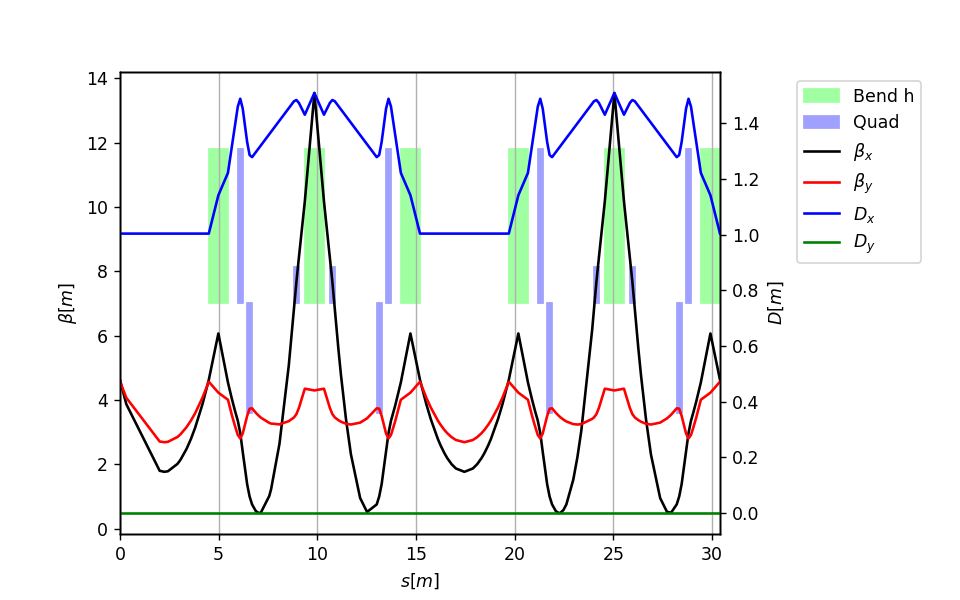

In [18]:
line_mad = xt.Line.from_madx_sequence(madx.sequence.elena)
line_mad.particle_ref = xt.Particles(p0c=0.1, mass0=0.938272, q0=1)
line_mad.configure_bend_model(core='adaptive', edge='full')

bend_fint = line_mad["lnr.mbhek.0640.h2"].edge_exit_fint
print(f"Fringe field integral in lattice: {bend_fint}")

tw = line_mad.twiss4d()
tw.plot()

In [20]:
line_mydipole = line_mad.copy()
dipole_s = line_mad.get_s_position(at_elements="lnr.mbhek.0135.m")
line_mydipole.remove("lnr.mbhek.0135.h1")
line_mydipole.remove("lnr.mbhek.0135.m")
line_mydipole.remove("lnr.mbhek.0135.h2")
line_mydipole.insert("mydipole1",dipole,at=dipole_s)

Slicing line:   0%|          | 0/198 [00:00<?, ?it/s]

In [21]:
tw2=line_mydipole.twiss4d(include_collective=True,compute_chromatic_properties=False)

In [80]:
#tw2=line_mydipole.twiss4d(particle_on_co=line_mydipole.particle_ref.copy(),include_collective=True)

<IPython.core.display.Javascript object>


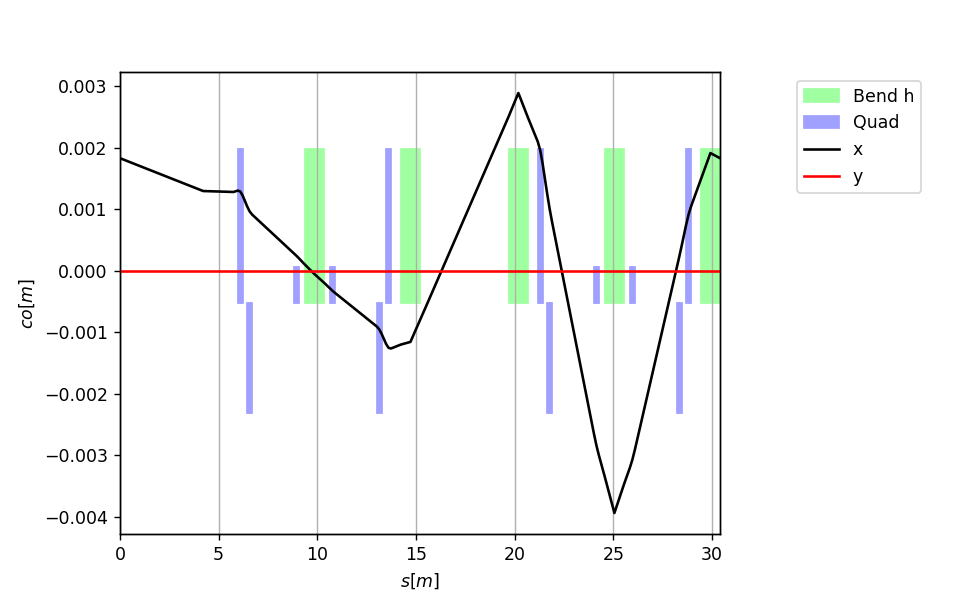

In [22]:
tw2.plot('x y')

<IPython.core.display.Javascript object>


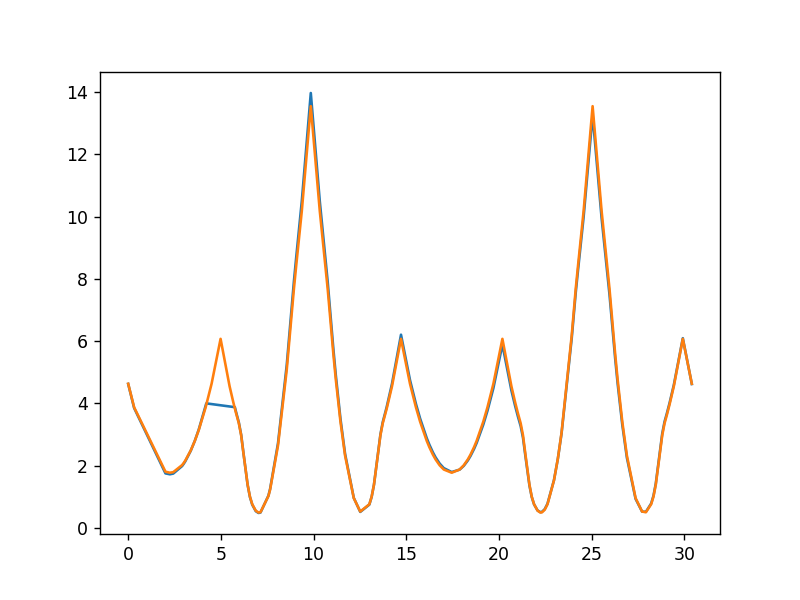

<IPython.core.display.Javascript object>


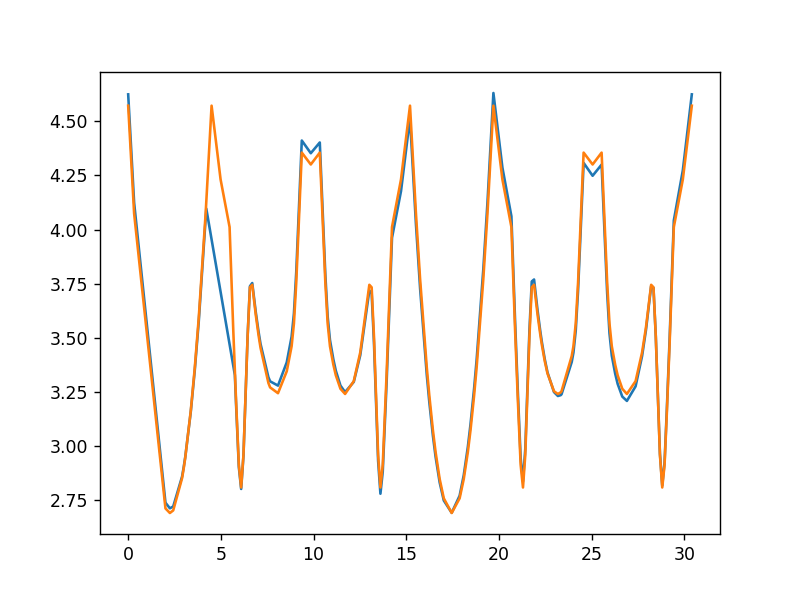

In [90]:
plt.figure()
plt.plot(tw2.s, tw2.betx)
plt.plot(tw.s,tw.betx)
plt.figure()
plt.plot(tw2.s, tw2.bety)
plt.plot(tw.s,tw.bety)

In [92]:
tw2.qx,tw.qx,tw2.qy,tw.qy

(2.365527973141837, 2.3616898448610883, 1.3883205045973073, 1.3899257304100339)

In [104]:
mat_line=line_mydipole.compute_one_turn_matrix_finite_differences(p0,include_collective=True)['R_matrix']

In [106]:
np.linalg.det(mat_line)

1.0001375503726184

In [103]:
dipole.H_bent_in.track??